In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt

import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv("insurance(1).csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [35]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

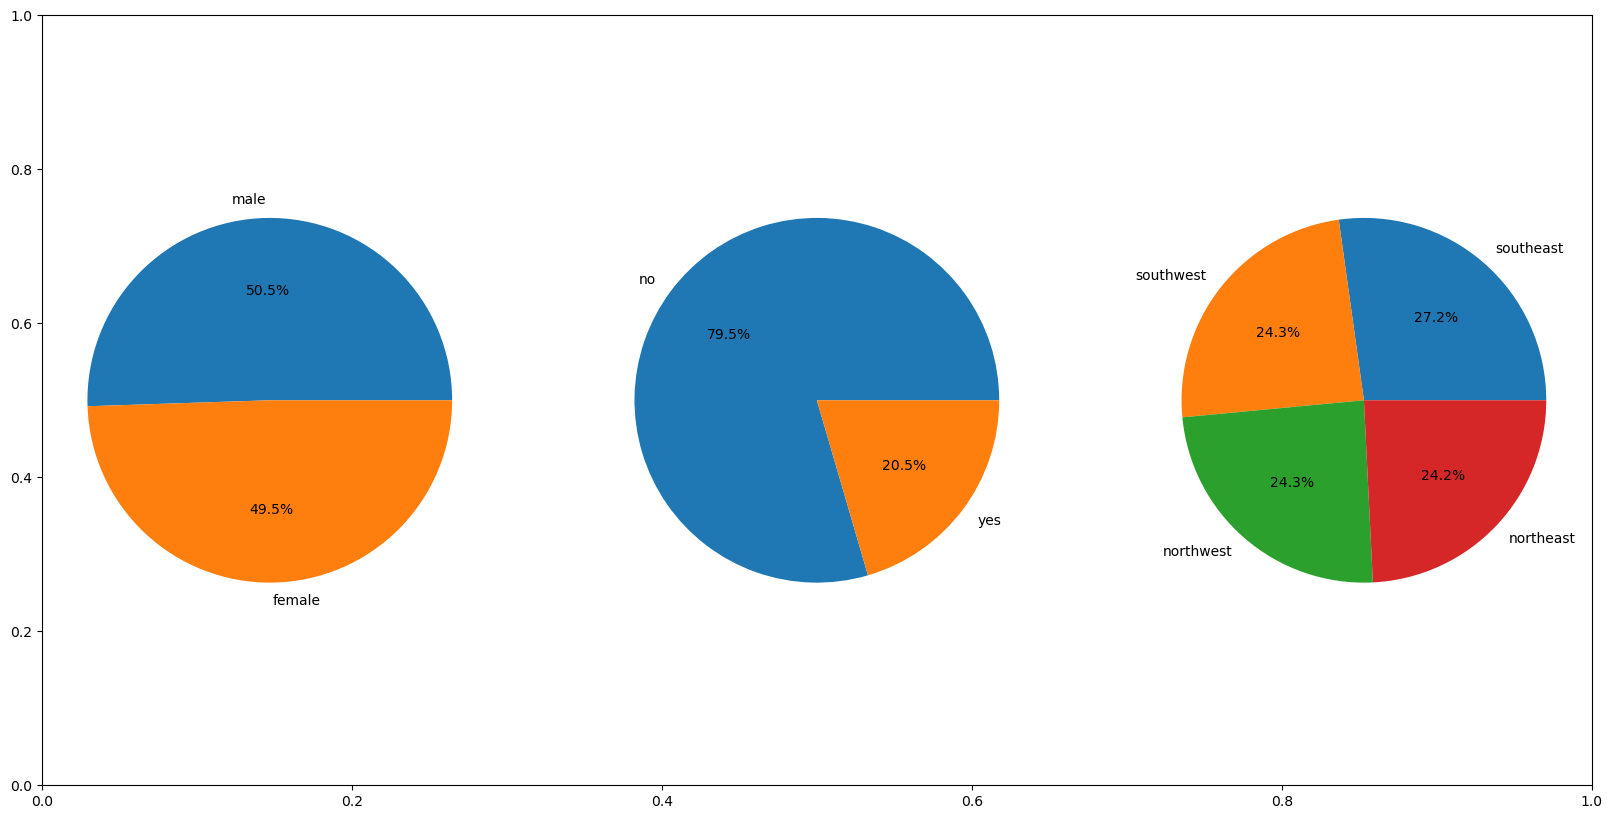

In [36]:
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize = (20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

In [37]:
#plot a bar graph
#features = ['sex', 'children', 'smoke', 'region']

<Axes: ylabel='age'>

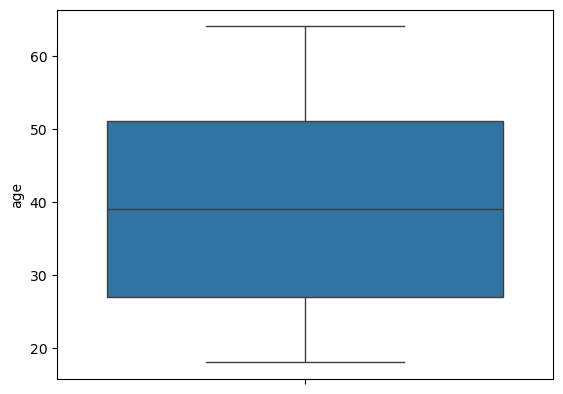

In [38]:
#data processing
#deleting duplicates
df.drop_duplicates(inplace=True)
sns.boxplot(df["age"])

<Axes: ylabel='bmi'>

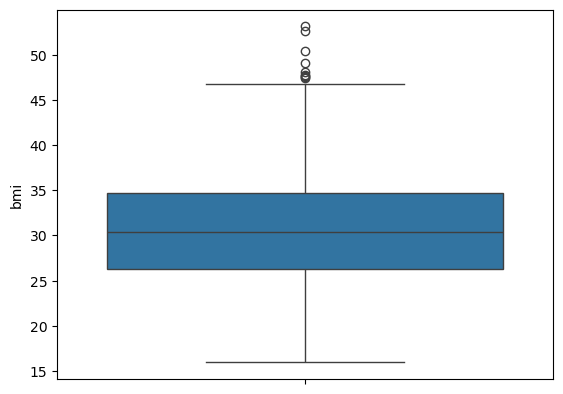

In [39]:
sns.boxplot(df['bmi'])
#we can se there exists outliers in BMI column

In [40]:
#Removing outliers
#We need to treat the outliers by replacing the values with the mean since bmi column consists outliers

Q1 = df['bmi'].quantile(0.25)
Q2 = df['bmi'].quantile(0.5)
Q3 = df['bmi'].quantile(0.75)


iqr = Q3-Q1
lowlim = Q1-1.5*iqr
upplim = Q3+1.5*iqr


print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


<Axes: ylabel='bmi'>

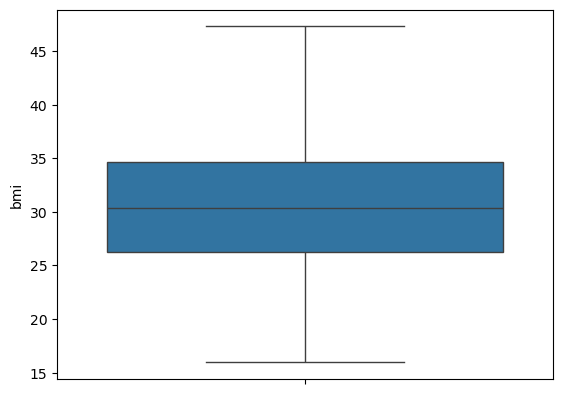

In [44]:
from feature_engine.outliers import ArbitraryOutlierCapper
#from feature_engine.outlier import ArbitraryOutlierCapper
arb = ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict = {
    'bmi':47.315})
df[['bmi']] = arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [45]:
#Data Wrangling
#this is a techique to ensure whether the data follow normal or standard distribution
print(df['bmi'].skew())
print(df['age'].skew())


0.23289153320569975
0.054780773126998195


In [ ]:
#From the above ,both age amd bmi cplumn approximatly 

In [54]:
#encoding
#encoding to be done for descrete categoraial data i.e sex ,smoke ,and region
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'northwest':0, 'northeast':1, 'southeast':2, 'southwest':3})
                                 

In [55]:
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19  NaN  27.900         0     NaN     NaN  16884.92400
1      18  NaN  33.770         1     NaN     NaN   1725.55230
2      28  NaN  33.000         3     NaN     NaN   4449.46200
3      33  NaN  22.705         0     NaN     NaN  21984.47061
4      32  NaN  28.880         0     NaN     NaN   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50  NaN  30.970         3     NaN     NaN  10600.54830
1334   18  NaN  31.920         0     NaN     NaN   2205.98080
1335   18  NaN  36.850         0     NaN     NaN   1629.83350
1336   21  NaN  25.800         0     NaN     NaN   2007.94500
1337   61  NaN  29.070         0     NaN     NaN  29141.36030

[1337 rows x 7 columns]


In [62]:
#model development
x = df.drop(['charges'], axis=1)
y = df[['charges']]

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import train_test_split, cross_val_score

In [63]:
l1 = []
l2 = []
l3 = []
cvs = 0

for i in range(40,50):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.2,random_state = i)
    lrmodel =LinearRegression()
    lrmodel.fit(xtrain, ytrain)
    l1.append(lrmodel.score(xtrain, ytrain))
    l2.append(lrmodel.score(xtest, ytest))
    cvs = (cross_val_score(rfmodel, X, Y, cv=5,)).mean()
    l3.append(cvs)
    df1 = pd.DataFrame({'Train Acc':l1, 'Test Acc':I2, 'Cross Val Score':I3})
print(df1)

                                                 

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values